In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from transformers import AutoTokenizer

In [2]:
product_df = pd.read_csv('product_catalogue-v0.1.csv')
test_df = pd.read_csv('test_public-v0.1.csv')
train_df = pd.read_csv('train-v0.1.csv')
train_df = train_df.merge(product_df,left_on = ['product_id','query_locale'],right_on=['product_id','product_locale'], how= 'left')
test_df = test_df.merge(product_df,left_on = ['product_id','query_locale'],right_on=['product_id','product_locale'], how= 'left')

# <center>EDA</center> 

In [3]:
print("Total number of train data = " , train_df.shape[0])
print("Total number of test data = " , test_df.shape[0])
print("Total number of product = " , product_df.shape[0])

Total number of train data =  1834744
Total number of test data =  394367
Total number of product =  1815216


### Train Essay Sample

In [4]:
row = dict(train_df.iloc[0,:])
for name, value in row.items():
    print(f'{name}:{value}')

example_id:0
query:11 degrees
product_id:B079VKKJN7
query_locale:es
esci_label:exact
product_title:11 Degrees de los Hombres Playera con Logo, Negro, L
product_description:Esta playera con el logo de la marca Carrier de 11 Degrees viene en negro, con el logo de la marca en el pecho y un pequeño texto en la parte posterior. La camiseta tiene cuello redondo y manga corta.
product_bullet_point:11 Degrees Negro Playera con logo
A estrenar y genuina. Somos un vendedor autorizado de 11 Degrees.
Ver descripción del producto para obtener más información.
product_brand:11 Degrees
product_color_name:Negro
product_locale:es


### Test Essay Sample

In [5]:
row = dict(test_df.iloc[0,:])
for name, value in row.items():
    print(f'{name}:{value}')


example_id:2227371
query:2 camas compacto
product_id:B06X3ZWQ72
query_locale:es
product_title:vidaXL Sofá Cama Extensible de Doble Altura Madera Pino Blanco Sillón Dormir
product_description:<p>Este sofá cama doble es una excelente solución para personas con espacio limitado. Proporciona espacio para dormir para dos personas, al tiempo que maximiza el espacio disponible en el suelo. La cama de abajo se estira suavemente, por lo que se puede convertir fácilmente en un sofá durante el día y en una cama cómoda por la noche. Además, la cama inferior está equipada con una tabla lateral que evitará que el usuario se caiga mientras duerme. Toda la estructura de la cama tiene una construcción de madera robusta, lo que la hace muy duradera y adecuada para el uso diario. El montaje es bastante fácil.Tenga en cuenta que la entrega incluye la estructura de la cama solamente, los colchones no están incluidos.</p> <ul><li>Color: Blanco</li><li>Material: Estructura de madera de pino + listones de mad

### Quick view of Train Dataframe

In [6]:
train_df.head()

example_id       query  product_id query_locale esci_label  \
0           0  11 degrees  B079VKKJN7           es      exact   
1           1  11 degrees  B079Y9VRKS           es      exact   
2           2  11 degrees  B07D2DDCZH           es      exact   
3           3  11 degrees  B07DP4LM9H           es      exact   
4           4  11 degrees  B07G37B9HP           es      exact   

                                       product_title  \
0  11 Degrees de los Hombres Playera con Logo, Ne...   
1          Camiseta Eleven Degrees Core TS White (M)   
2  11 Degrees de los Hombres Camiseta Muscle Fit,...   
3  11 Degrees de los Hombres Core Pull Over Hoodi...   
4          11 Degrees Poli Panel Track Pant XL Black   

                                 product_description  \
0  Esta playera con el logo de la marca Carrier d...   
1                                                NaN   
2  De 11 Degrees viene la camiseta Muscle Fit en ...   
3  La sudadera con capucha Core Pull Over de 11 G...   
4                                                NaN   

                                product_bullet_point product_brand  \
0  11 Degrees Negro Playera con logo\nA estrenar ...    11 Degrees   
1                                                NaN    11 Degrees   
2  11 Degrees Negro Camiseta Muscle Fit\nA estren...    11 Degrees   
3  11 Degrees Azul Core Pull Over Hoodie\nA estre...    11 Degrees   
4                                                NaN    11 Degrees   

  product_color_name product_locale  
0              Negro             es  
1             Blanco             es  
2              Negro             es  
3               Azul             es  
4                NaN             es

### Basic statistics of training data

#### length of string filter

In [7]:
lens = lambda x: len(str(x))
length_train_df = pd.DataFrame()
for name in train_df.columns:
    if ('product' in name or 'query' in name) and 'locale' not in name:
        length_train_df[f'{name}_length'] = train_df[name].apply(lens)
round(length_train_df.describe(),2)

query_length  product_id_length  product_title_length  \
count    1834744.00          1834744.0            1834744.00   
mean          19.52               10.0                103.33   
std           10.05                0.0                 53.79   
min            1.00               10.0                  1.00   
25%           12.00               10.0                 60.00   
50%           18.00               10.0                 94.00   
75%           25.00               10.0                148.00   
max          165.00               10.0                400.00   

       product_description_length  product_bullet_point_length  \
count                  1834744.00                   1834744.00   
mean                       396.06                       560.15   
std                        584.46                       517.23   
min                          1.00                         1.00   
25%                          3.00                       121.00   
50%                          3.00                       429.00   
75%                        667.00                       888.00   
max                       8640.00                      2503.00   

       product_brand_length  product_color_name_length  
count            1834744.00                 1834744.00  
mean                   9.03                       6.82  
std                    5.61                       6.49  
min                    1.00                       1.00  
25%                    6.00                       3.00  
50%                    7.00                       5.00  
75%                   11.00                       8.00  
max                  100.00                     100.00

#### label count

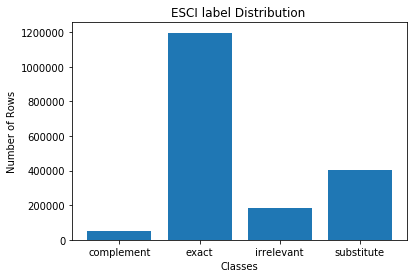

In [8]:
plt.bar(
    x = np.unique(train_df["esci_label"]),
    height = [list(train_df["esci_label"]).count(i) for i in np.unique(train_df["esci_label"])] , 
) 
plt.xlabel("Classes")
plt.ylabel("Number of Rows")
plt.title('ESCI label Distribution ')
plt.show()

### Null Values 

In [9]:
train_df.isnull().sum()

example_id                   0
query                        0
product_id                   0
query_locale                 0
esci_label                   0
product_title              238
product_description     943889
product_bullet_point    254724
product_brand           116857
product_color_name      638100
product_locale               0
dtype: int64

# <center>STRING FILTER DISTRIBUTION</center> 

### Length

In [10]:
lens = lambda x: len(str(x))
length_train_df = pd.DataFrame()
for name in train_df.columns:
    if ('product' in name or 'query' in name) and ('locale' not in name and 'id' not in name):
        length_train_df[f'{name}_length'] = train_df[name].apply(lens)

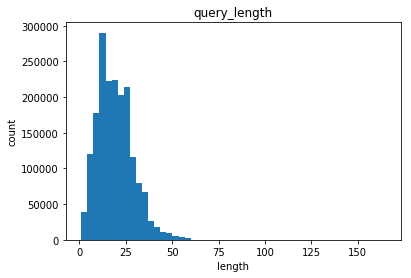

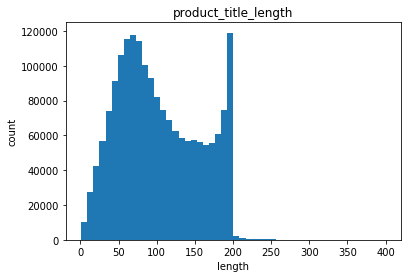

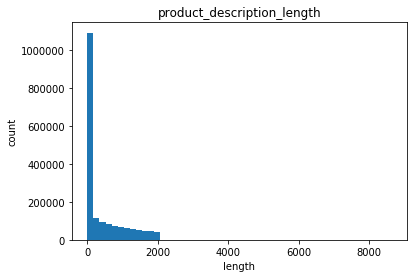

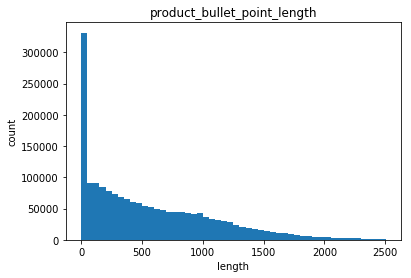

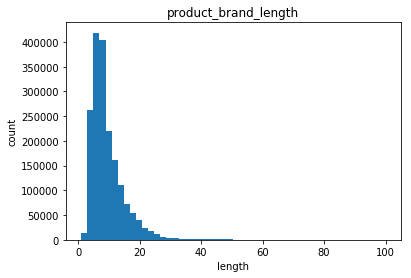

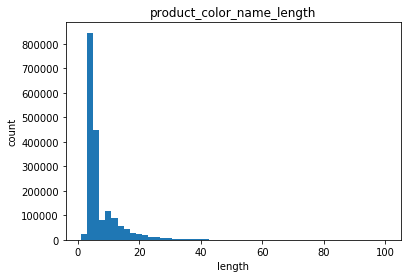

In [11]:
for name in length_train_df.columns:
    plt.hist(length_train_df[name],bins=50)
    plt.xlabel("length")
    plt.ylabel("count")
    plt.title(name)
    plt.show()


# <center>Token Length  In A PreTrained Model</center> 

### use bert-base-multilingual-cased as example

In [12]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

In [13]:
df = train_df.sample(100000,random_state= 2022)
token_len = []
bar = tqdm(df.iterrows(),total=df.shape[0])
for i, row in bar:
    text = [row['query'], row['product_title'], row['product_bullet_point'], row['product_brand'],
            row['product_color_name'], row['product_locale'], row['product_description']]
    text = [str(i) for i in text]
    text = f' {tokenizer.sep_token} '.join(text)
    encoded_text = tokenizer.encode_plus(text, add_special_tokens=False)
    input_ids = encoded_text["input_ids"]
    token_len.append(len(input_ids))

  0%|          | 0/100000 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (520 > 512). Running this sequence through the model will result in indexing errors


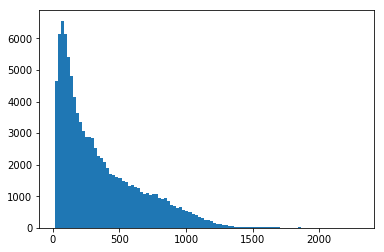

In [14]:
plt.hist(token_len,bins=100)
plt.show()

In [15]:
pd.Series(token_len).describe()

count    100000.000000
mean        355.352420
std         306.092315
min          13.000000
25%         111.000000
50%         258.000000
75%         530.000000
max        2299.000000
dtype: float64

### 

In [16]:
import re
def cleanText(text):
    pattern = re.compile(r'<[^>]+>',re.S)
    text = pattern.sub('', text)
    return text

token_len = []
bar = tqdm(df.iterrows(),total=df.shape[0])
for i, row in bar:
    text = [row['query'], row['product_title'], row['product_bullet_point'], row['product_brand'],
            row['product_color_name'], row['product_locale'], row['product_description']]
    text = [cleanText(str(i)) for i in text]
    text = f' {tokenizer.sep_token} '.join(text)
    encoded_text = tokenizer.encode_plus(text, add_special_tokens=False)
    input_ids = encoded_text["input_ids"]
    token_len.append(len(input_ids))

  0%|          | 0/100000 [00:00<?, ?it/s]

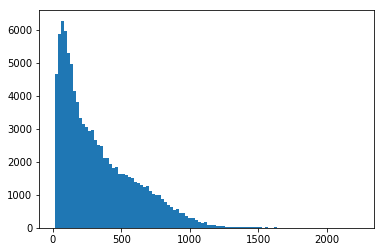

In [18]:
plt.hist(token_len,bins=100)
plt.show()

In [19]:
pd.Series(token_len).describe()



count    100000.000000
mean        330.892870
std         271.694514
min          13.000000
25%         110.000000
50%         253.000000
75%         494.000000
max        2233.000000
dtype: float64